In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
Transaction = pd.read_csv('data/E-Commerce.csv', encoding = "ISO-8859-1")

In [4]:
Transaction.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
Transaction = Transaction.set_index('InvoiceDate')

In [6]:
Transaction.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
12/1/2010 8:26,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom
12/1/2010 8:26,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom
12/1/2010 8:26,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom
12/1/2010 8:26,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom
12/1/2010 8:26,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom


In [7]:
Transaction = Transaction.reset_index()

In [8]:
Transaction.dtypes

InvoiceDate     object
InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [9]:
Transaction['InvoiceDate'] = pd.to_datetime(Transaction['InvoiceDate'])

In [10]:
Transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceDate    541909 non-null datetime64[ns]
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [11]:
Transaction = Transaction.set_index('InvoiceDate')

In [12]:
Transaction = Transaction.sort_index()

In [13]:
Transaction['Sales'] = Transaction['Quantity'] * Transaction['UnitPrice']

In [14]:
Transaction = Transaction[(Transaction['Sales'] < 5000) & (Transaction['Sales'] > 0)]

In [15]:
Sales_per_Month = Transaction['Sales'].resample('M').sum()

In [16]:
Sales_per_Month

InvoiceDate
2010-12-31     810204.810
2011-01-31     607641.560
2011-02-28     523631.890
2011-03-31     717639.360
2011-04-30     531269.221
2011-05-31     762393.270
2011-06-30     722769.900
2011-07-31     719221.191
2011-08-31     748076.320
2011-09-30    1051445.452
2011-10-31    1154979.300
2011-11-30    1509496.330
2011-12-31     470323.080
Freq: M, Name: Sales, dtype: float64

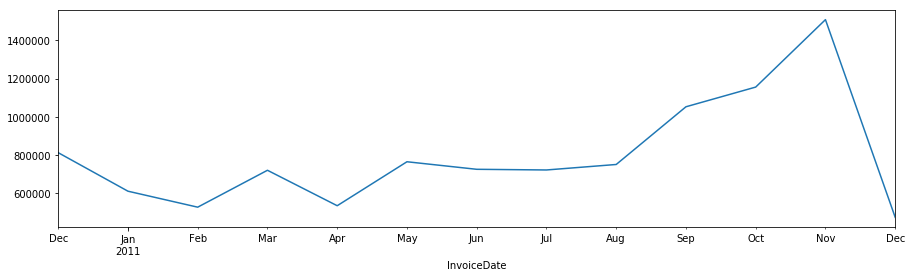

In [17]:
Sales_per_Month.plot(kind='line', figsize=(15, 4))

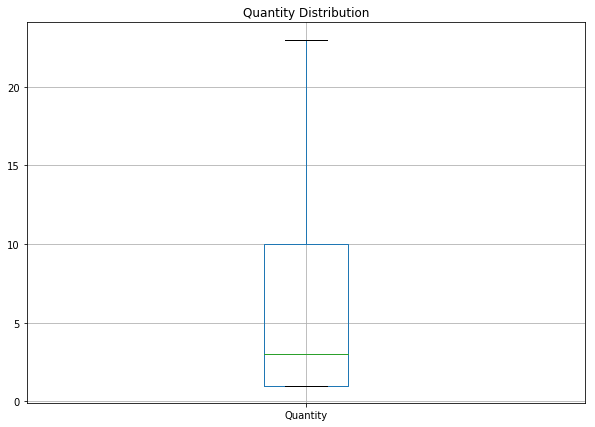

In [18]:
Transaction['Quantity'].plot(kind='box', figsize=(10, 7), title='Quantity Distribution', grid=True, showfliers=False)

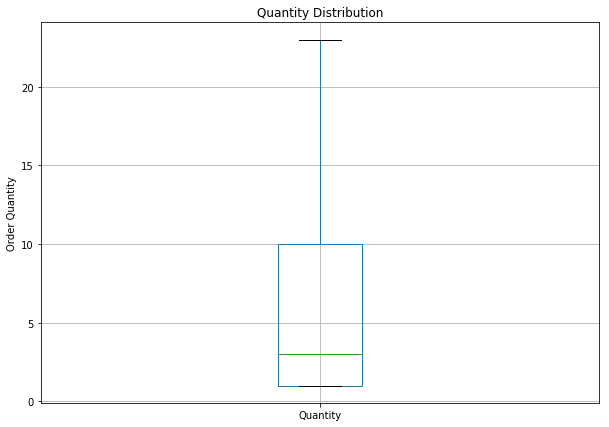

In [19]:
ax = Transaction['Quantity'].plot.box(
    showfliers = False,
    grid=True,
    figsize=(10,7)
)

ax.set_ylabel('Order Quantity')
ax.set_title('Quantity Distribution')

plt.suptitle("")
plt.show()

In [37]:
T120 = Transaction[Transaction['Quantity' ] < 120]

In [39]:
T120V = T120['Quantity'].value_counts()

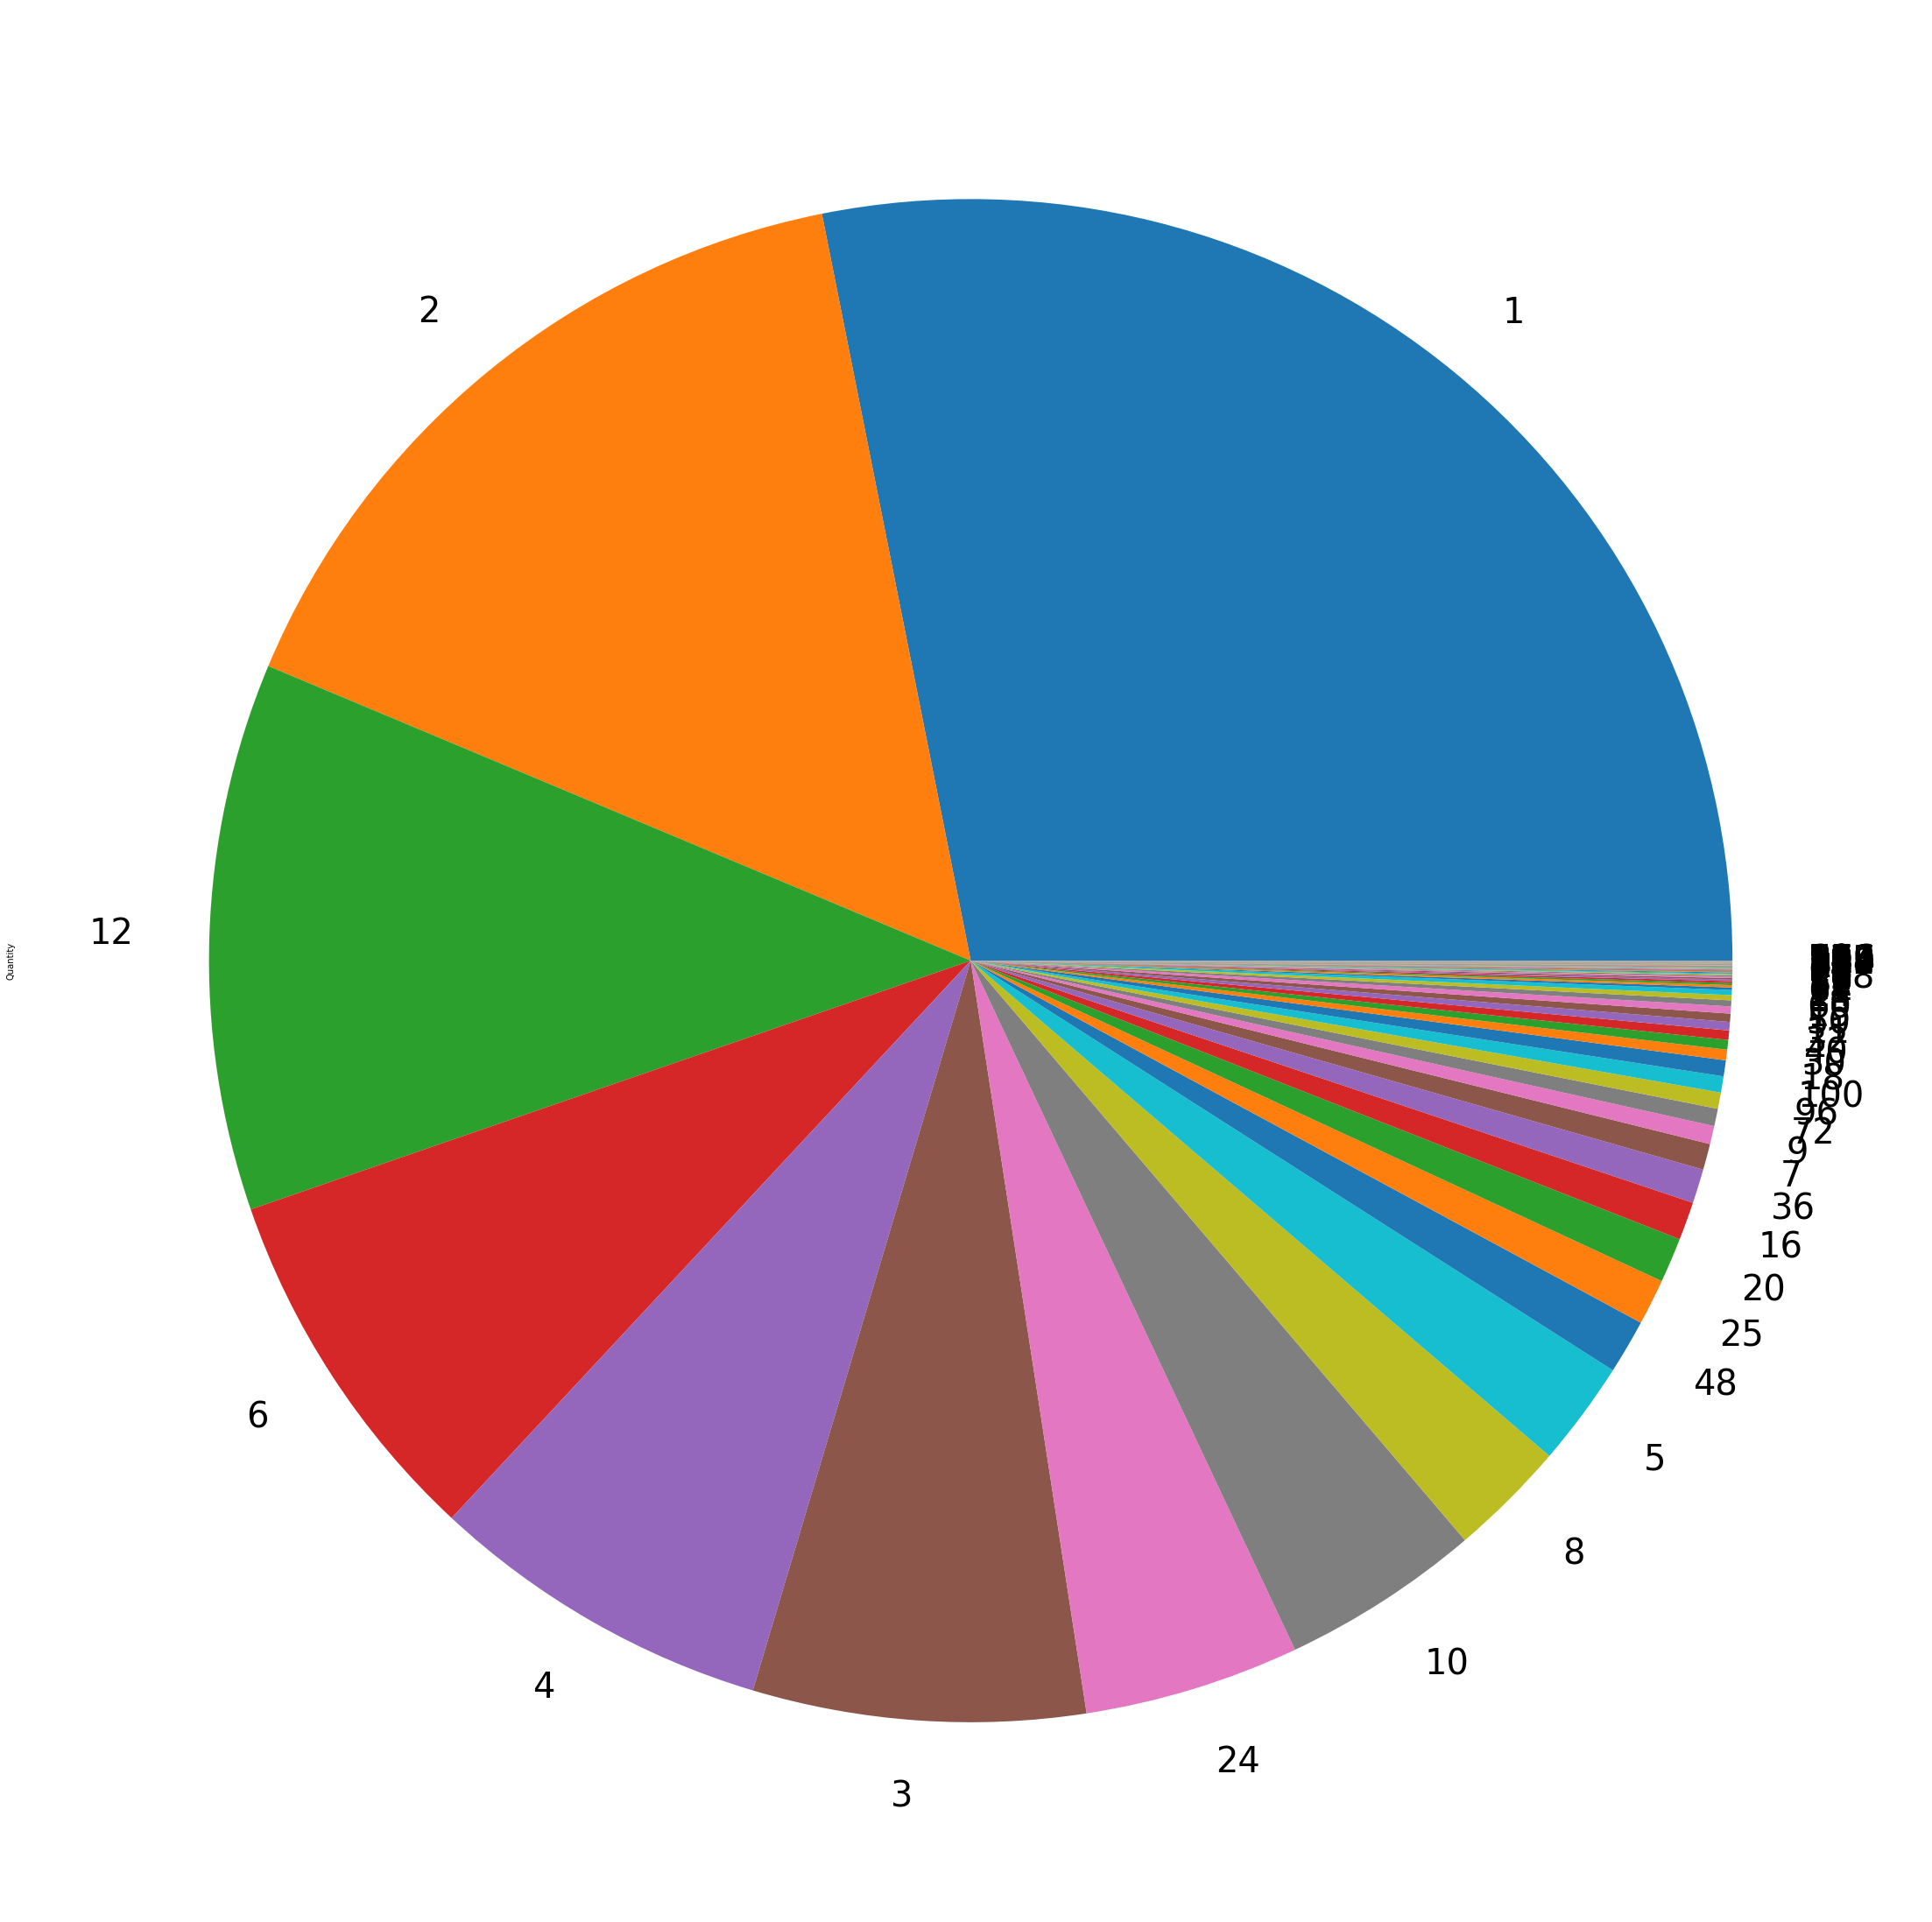

In [47]:
T120V.plot(kind='pie', figsize=(40, 40), fontsize=40)